<a href="https://colab.research.google.com/github/Harshilkumarghori/localrepo/blob/main/Scalling(day_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scaling

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('Social_Network_Ads.csv')

In [71]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size= 0.3, random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [76]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [77]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


Scatter Plot Before and After Scaling

Text(0.5, 1.0, 'After Scaling')

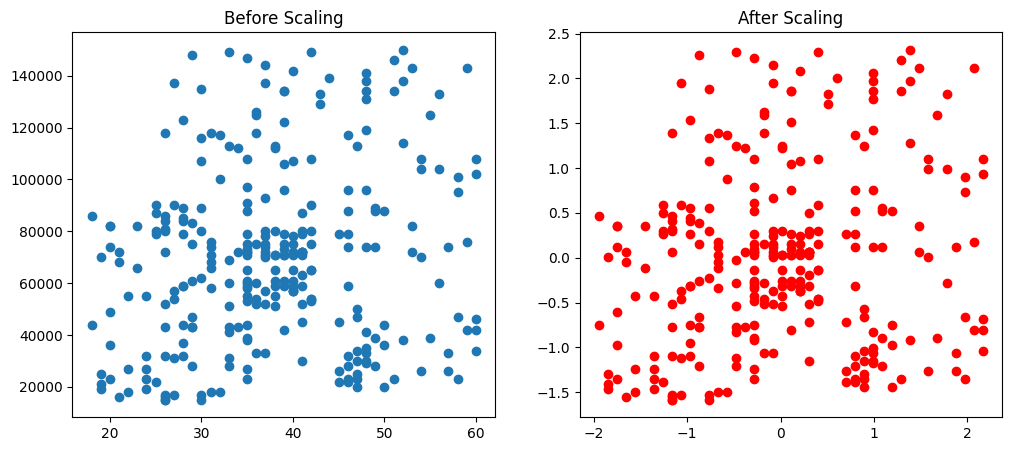

In [78]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

PDF plot before and After Scaling

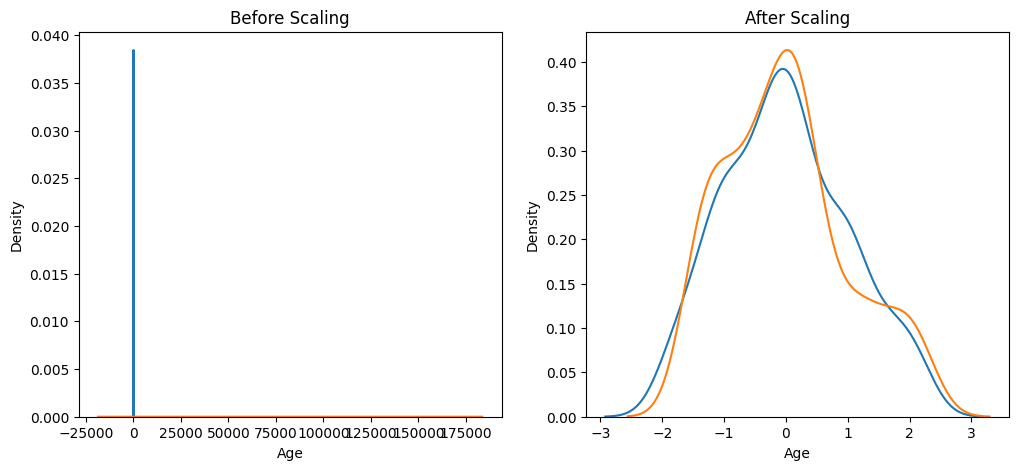

In [83]:
fig,(ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

#Before Scalling
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')

#After Scaling
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling')
plt.show()


Age Distribution Before and After Scaling

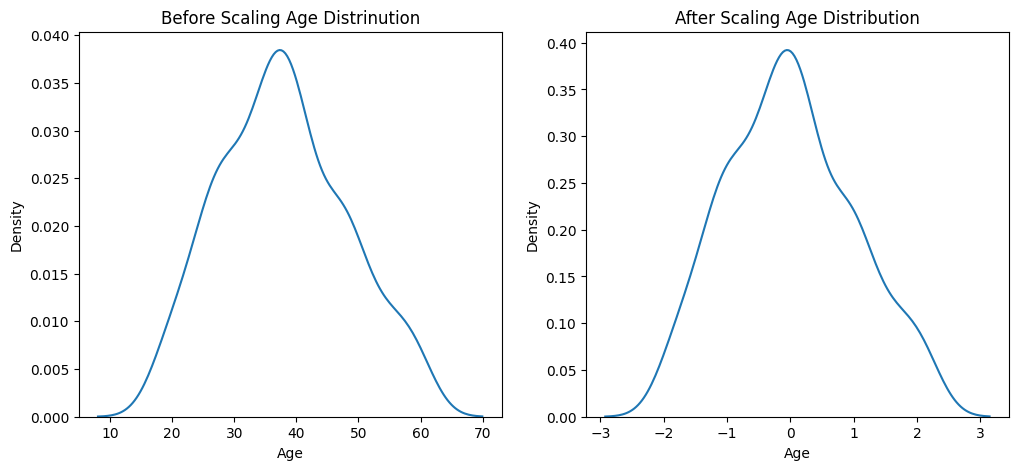

In [84]:
fig,(ax1,ax2)=plt.subplots(ncols=2 , figsize=(12,5))
sns.kdeplot(X_train['Age'],ax=ax1)
ax1.set_title('Before Scaling Age Distrinution')

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title('After Scaling Age Distribution')
plt.show()

Estimated Salary Distribution Before and After Scaling

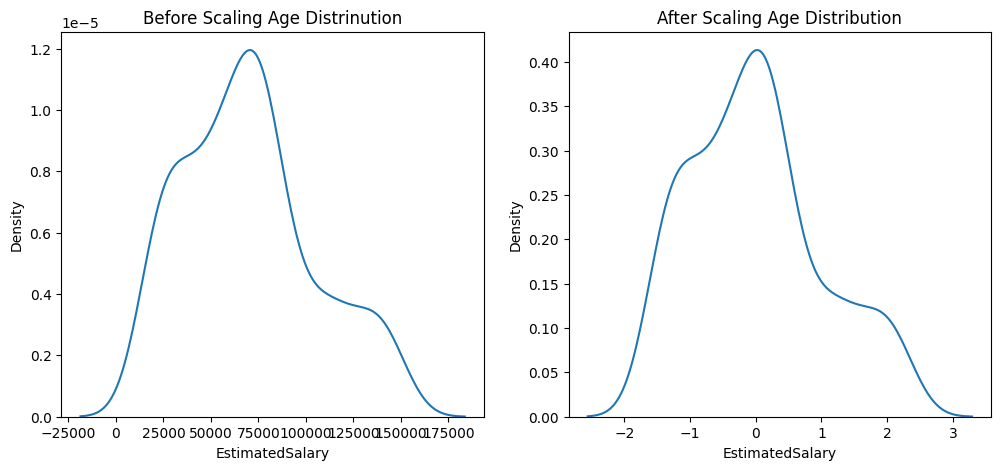

In [85]:
fig,(ax1,ax2)=plt.subplots(ncols=2 , figsize=(12,5))
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Scaling Age Distrinution')

sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After Scaling Age Distribution')
plt.show()

**Why Scaling is Important**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [88]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [89]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [92]:
accuracy_normal=accuracy_score(y_test,y_pred)
accuracy_scaled=accuracy_score(y_test,y_pred_scaled)

In [93]:
accuracy_normal,accuracy_scaled

(0.6583333333333333, 0.8666666666666667)

**Decision tree**

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [107]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [108]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [109]:
accuracy_normal = accuracy_score(y_test,y_pred)*100
accuracy_scaled = accuracy_score(y_test,y_pred_scaled)*100

In [110]:
accuracy_normal,accuracy_scaled

(86.66666666666667, 87.5)